In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as mplib
import thinkdsp
from array import array

% matplotlib inline
# This function converts a string into a numpy array of bits
# note that it is assumed that each character is 7 bits long here
def string2NPArray(s):
    bits = np.array([])
    for a in bytearray(s, 'ascii'):
        for b in range(0,7):
            bits = np.append(bits,float((a>>(7-b-1))&1))
    return bits

# This function converts a numpy array of bits to a string
# note that it is assumed that each character is 7 bits long here
def NPbits2String(bits):
    S = ""
    for a in np.arange(0, np.ceil(len(bits)/7)):
        tmp = 0
        for k in np.arange(0,7):
            b = bits[a*7+k]
            tmp = tmp + (2**(6-k))*b
        S = S + chr(int(tmp))
    return S

# this function is used to help convert numpy array data into a format
# suitable for writing into a wave file
def convert_to_int16(sig):
    # convert into int16  to write as wave
    sig = (sig/np.max(sig))*(2**14)
    sig = sig.astype('int16')
    return sig
    

# this is a utility function that  finds the start and  end 
# of transmission in the numpy array of samples xf
# The function looks for the first instance where the entries of xf
# go above threshold and returns the index into xf where this happens
# in start_idx
# The function looks for the last instance where the entries of xf
# are above threshold and returns the index into xf where this happens
# in end_idx
# 
# You will probably have to do some trial and error to get the threshold right
# one possibility is to se the threshold equal to some factor of the maximum value
# in the input signal,  e.g. 0.3 * maximum value in xf
#
def find_start_and_end(xf, threshold = 2000): 
    import numpy as np    
    start_idx = -1
 
    for k in range(0, len(xf)):
        if(np.abs(xf[k])) > threshold:
            start_idx = k
            break

    if(start_idx  < 0):
        print "Unable to detect start of transmission"
        return -1
    
    end_idx = -1
    
    for k in range(0, len(xf)):
        if(np.abs(xf[len(xf)-k-1])) > threshold:
            end_idx = len(xf)-k-1
            break

    if(end_idx < 0):
        print "Unable to detect end of transmission"
        return -1

    return start_idx, end_idx

    

bpsk is a module that is provided as python bytecode. bpsk.help() provides the syntax and definitions of the parameters of the functions that are included in the bpsk module

In [6]:
import bpsk

bpsk.help()

This module provides:

     generate_bpsk_signal(bits, rate=8000, symbol_len = 250, freq = 1000):
         Returns a numpy array which is a BPSK encoding of bits
         1 symbol worth of zeros are added at the beginning and the end to aid detection of transmission start
         A 1 bit is added to the beginning to help with synchronization
         bits -  a numpy array of 1s and 0s
         rate - sample rate used
         symbol_len - length in samples of the rectangular pulse used to encode the bits
         freq - carrier frequency in Hz

     decode_bpsk_signal(x, freq=1000, rate = 8000, symbol_len = 250, detection_threshold_factor = 0.3, LPFbw = 320):
         Decodes a received BPSK signal in vector x and produces a numpyarray of bits 
         The function uses a brute-force approach to carrier phase synchronization by checking 16 evenly spaced
         phase offsets between -pi and pi to find the one which results in the strongest demodulated signal
         which is then u

The following cell generates a bpsk signal and plays it through the sound card
Your job will be to make your own function that generates the transmitted signal, i.e. your own version of bpsk.generate_bpsk_signal. Run bpsk.help() to learn about what  bpsk.generate_bpsk_signal does. At a minimum, you should be able to transmit a 5 character word from one computer to another over the air.

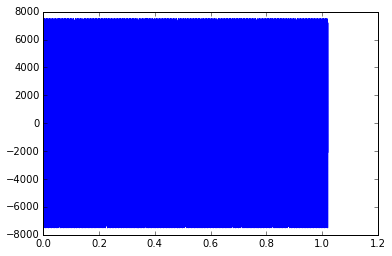

In [16]:
bits = string2NPArray("Hello")

def generate_bpsk_signal(bits, rate=8820, symbol_len=250, freq=1000):
    bits = np.insert(bits, 0, np.array([1]))
    x = np.array([])
    for i in range(0, len(bits)):
        if bits[i] == 1.0:
            x = np.append(x, 7500*np.ones(symbol_len))
        if bits[i] == 0.0:
            x = np.append(x, -7500*np.ones(symbol_len))
            
    ts = np.arange(0, len(x)/float(rate), 1/float(rate))
    w = 2*np.pi*freq
    x *= np.cos(w*ts)
    
    return (ts, x)
    
test = generate_bpsk_signal(bits)
ts = test[0]
x = test[1]

mplib.plot(ts, x)
mplib.show()

In [11]:
wavfile.write('AcousticModemTx_ZG.wav', 8820, convert_to_int16(x))

wave = thinkdsp.read_wave('AcousticModemTx_ZG.wav')
wave.normalize()
wave.make_audio()

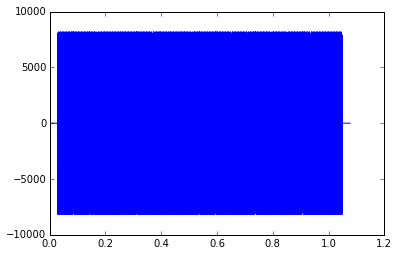

In [7]:

# convert a text string to a numpy array of 1s and 0s
bits = string2NPArray("Hello")
# generate a BPSK signal with 8820 samples per second, and 250 sample long symbols, and carrier frequency of 1kHz
x = bpsk.generate_bpsk_signal(bits, rate = 8820, symbol_len = 250, freq = 1000)
rate = 8820
# plot the signal to visualize
# first make a vector to represent the sampling times
# the times range from t = 0 up to the length of the data samples times the sampling period
ts = np.arange(0, len(x)/float(rate), 1/float(rate))
# plot the signal in the time domain
# you should zoom in to see the BPSK signal
mplib.plot(ts, x)
mplib.show()

# write the wave file for the first signal which is assumed
# to  be in stored in the numpy array x
wavfile.write('AcousticModemTx.wav', 8820, convert_to_int16(x))





In [8]:
# use thinkdsp tools to play the wave file with the BPSK signal
wave = thinkdsp.read_wave('AcousticModemTx.wav')
wave.normalize()
wave.make_audio()
